from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install holisticai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.5 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=43f974c8d200d86f5e681c5022390d737f8dbce16cab746f60c1260a22aa5290
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Settings
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



In [ ]:
len(columns_list)

33

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [ ]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [ ]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [ ]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [ ]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [ ]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [ ]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [ ]:
print(data['debt_to_income_ratio'].head(50))

54108     NaN
54116     NaN
54131     NaN
54139     NaN
64997      50
65587      50
65619      43
65778      30
65834      37
65915      30
65968      43
66011      30
66133      30
66171      60
66239      20
66308      20
126778     20
126783      0
126789     43
126790     36
126792     43
126793     37
126796     43
126797     43
126798     37
126802     20
126806     37
126807     20
126810     60
126813     37
126816     43
126820     30
126821     43
126826     36
126831     20
126835     43
126837     43
126839     20
126842      0
126845     30
126847     37
126850     37
126852      0
126856     30
126857     60
126859     30
126860     60
126862     37
126865     20
126870     30
Name: debt_to_income_ratio, dtype: object


In [ ]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [ ]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [ ]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [ ]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
import numpy as np
race_sums = race_binarized.sum(axis=1)
data['Mixed'] = (race_sums > 1).astype(int)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [ ]:
for i, race in enumerate(['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']):
    data[f'{race}'] = race_binarized[:, i]

In [ ]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
result_a =data[race_columns].sum(axis=1)<1
off_rows = data[result_a]
print(off_rows)

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White]
Index: []

[0 rows x 30 columns]


In [ ]:
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
print(data[race_columns])
data.loc[data['Mixed'] == 1, race_columns] = 0


         AI or AN  Asian  Black or AA  NH or PI  White
54108           0      1            0         0      0
54116           0      0            0         0      1
54131           0      0            0         0      1
54139           0      0            0         0      1
64997           0      1            0         0      0
...           ...    ...          ...       ...    ...
1547658         0      1            0         0      0
1547660         0      1            0         0      0
1547661         0      1            0         0      0
1547662         0      1            0         0      0
1547663         0      1            0         0      0

[58602 rows x 5 columns]


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [ ]:
import numpy as np
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      print(f"Column '{column}' has {y} distinct values", x)
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    print(f"Column '{column}' has BINARY distinct values", x)
    x+=1
  else:
    feature_dict['continuous'] = x
    print(f"Column '{column}' has CONTINUOUS distinct values", x)
    x+=1
  dicts[column]=feature_dict

Column 'county_code' has CONTINUOUS distinct values 0
Column 'census_tract' has CONTINUOUS distinct values 1
Column 'preapproval' has BINARY distinct values 2
Column 'loan_purpose' has 1 distinct values 3
Column 'loan_purpose' has 31 distinct values 4
Column 'loan_purpose' has 2 distinct values 5
Column 'loan_purpose' has 32 distinct values 6
Column 'loan_purpose' has 4 distinct values 7
Column 'loan_purpose' has 5 distinct values 8
Column 'lien_status' has BINARY distinct values 9
Column 'loan_amount' has CONTINUOUS distinct values 10
Column 'loan_to_value_ratio' has CONTINUOUS distinct values 11
Column 'loan_term' has 360.0 distinct values 12
Column 'loan_term' has 240.0 distinct values 13
Column 'loan_term' has 360 distinct values 14
Column 'loan_term' has 240 distinct values 15
Column 'loan_term' has 300 distinct values 16
Column 'loan_term' has 180 distinct values 17
Column 'loan_term' has 180.0 distinct values 18
Column 'loan_term' has 300.0 distinct values 19
Column 'loan_term' 

In [ ]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18.0: 25, 36.0: 26, '36': 27, '0': 28, '24': 29, '12': 30, 24.0: 31, 12.0: 32, '6': 33, '2': 34, 2: 35}, 'intro_rate_period': {60.0: 36, 1.0: 37, '1': 38, '84': 39, '60': 40, '299': 41, '120': 42, '3': 43, 84.0: 44, '12': 45, '6': 46, 12.0: 47, 6.0: 48, 120.0: 49, 9.0: 50}, 'negative_amortization': {'binary': 51}, 'interest_only_payment': {'binary': 52}, 'balloon_payment': {'binary': 53}, 'property_value': {'continuous': 54}, 'construction_method': {'binary': 55}, 'occupancy_type': {3: 56, 1: 57, 2: 58}, 'income': {'continuous': 59}, 'debt_to_inc

In [ ]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [ ]:
data = data_encoded

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       ...
       'co-applicant_credit_score_type_9.0',
       'co-applicant_credit_score_type_10.0',
       'co-applicant_credit_score_type_11.0', 'applicant_age_25-34',
       'applicant_age_35-44', 'applicant_age_45-54', 'applicant_age_55-64',
       'applicant_age_65-74', 'applicant_age_<25', 'applicant_age_>74'],
      dtype='object', length=101)

In [ ]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
 data = df_undersampled

In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [ ]:
#DATA ANALYSIS FOR EQUALIZED ODDS
from holisticai.datasets import load_dataset
from holisticai.bias.plots import group_pie_plot

<Axes: >

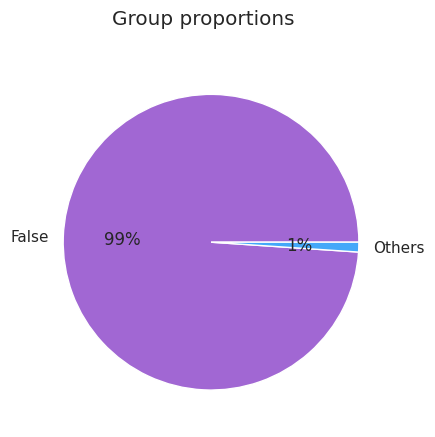

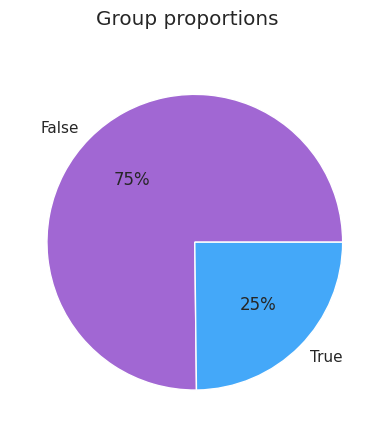

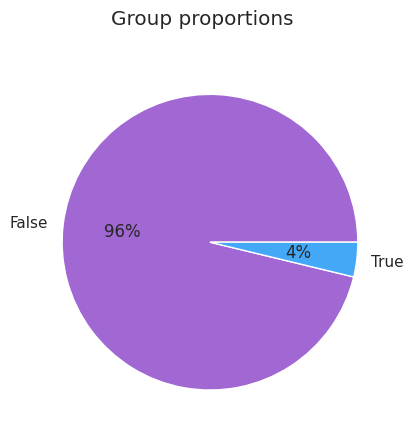

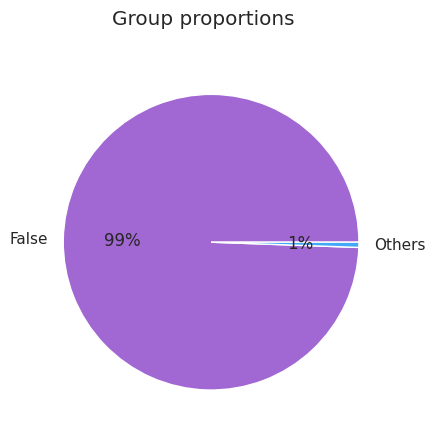

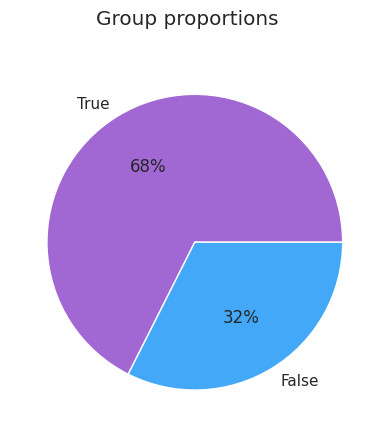

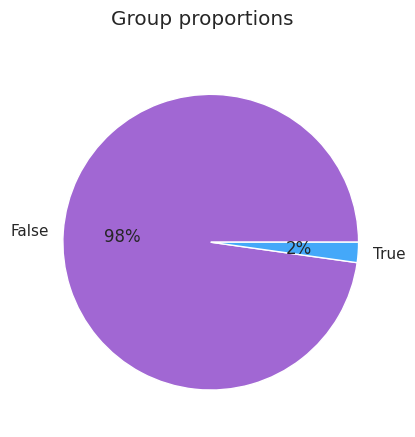

In [ ]:
group_ai_an = data['AI or AN'].astype(bool)
group_asian = data['Asian'].astype(bool)
group_black_aa = data['Black or AA'].astype(bool)
group_nh_pi = data['NH or PI'].astype(bool)
group_white = data['White'].astype(bool)
group_mixed = data['Mixed'].astype(bool)

group_pie_plot(group_ai_an)
group_pie_plot(group_asian)
group_pie_plot(group_black_aa)
group_pie_plot(group_nh_pi)
group_pie_plot(group_white)
group_pie_plot(group_mixed)

In [ ]:
#print(X_test['AI or AN'])
def group_success_rate(g, y):
  success_rate = y[g == 1].sum() / g.sum()  # success rate group_a
  return success_rate

In [ ]:
def statistical_parity_multigroup(group_labels, y_pred):
    success_rates = {}
    for i, group in enumerate(group_labels):

        success_rates[race_cols[i]] = group_success_rate(group, y_pred)

    return success_rates

In [ ]:
from sklearn.metrics import confusion_matrix
def tpr_multigroup(group_labels, y_pred, y_test, X_test):
    tpr_dict = {}

    for group in group_labels:
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = X_test[X_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])

        if cm.shape == (2, 2):
            TP = cm[0, 0]
            FN = cm[1, 0]
            tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
            tpr_dict[group] = tpr
        else:
            tpr_dict[group] = 0

    return tpr_dict

def fpr_multigroup(group_labels, y_pred, y_test, X_test):
    fpr_dict = {}

    for group in group_labels:
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = X_test[X_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])
        if cm.shape == (2, 2):
            FP = cm[0, 1]
            TN = cm[0, 0]
            fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
            fpr_dict[group] = fpr
        else:
            fpr_dict[group] = 0

    return fpr_dict



<Axes: >

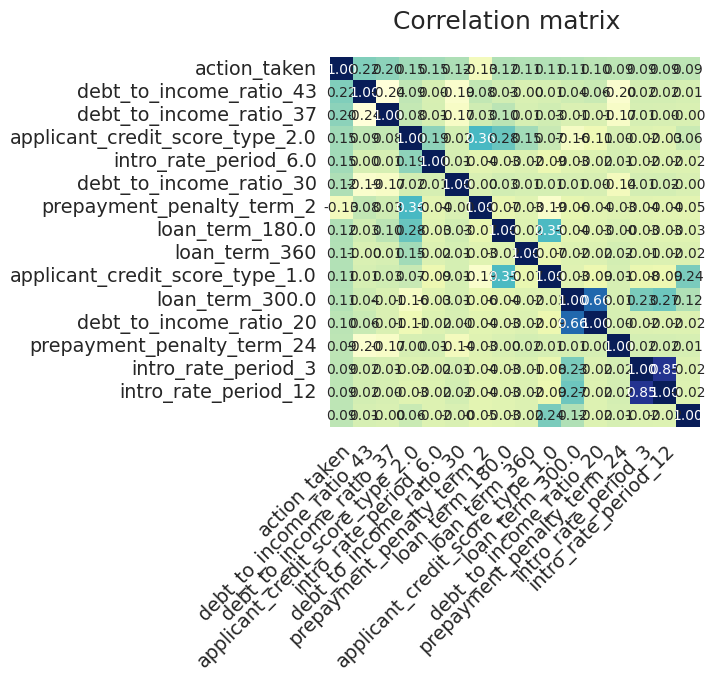

In [ ]:
from holisticai.bias.plots import correlation_matrix_plot

correlation_matrix_plot(data, target_feature='action_taken', n_features=15)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop(['action_taken'], axis=1)
y = data['action_taken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test, group_ai_an_tr, group_ai_an_ts, group_asian_tr, group_asian_ts, group_black_aa_tr, \
group_black_aa_ts, group_nh_pi_tr, group_nh_pi_ts, group_white_tr, group_white_ts, group_mixed_tr, group_mixed_ts = \
train_test_split(X, y, group_ai_an, group_asian, group_black_aa, group_nh_pi, group_white, group_mixed, test_size=0.2, random_state=42)

train_data = X_train, y_train
test_data  = X_test, y_test

In [ ]:
columns_with_na

[]

In [ ]:
group_ts = [group_ai_an_ts, group_asian_ts, group_black_aa_ts, group_nh_pi_ts, group_white_ts, group_mixed_ts]
group_tr = [group_ai_an_tr, group_asian_tr, group_black_aa_tr, group_nh_pi_tr, group_white_tr, group_mixed_tr]
race_cols = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White', 'Mixed']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from holisticai.pipeline import Pipeline
from sklearn import metrics


metrics_dict={
        "Accuracy": metrics.accuracy_score,
        "Balanced accuracy": metrics.balanced_accuracy_score,
        "Precision": metrics.precision_score,
        "Recall": metrics.recall_score,
        "F1-Score": metrics.f1_score}


# efficacy metrics dataframe helper tool
def metrics_dataframe(y_pred, y_true, metrics_dict=metrics_dict):
    metric_list = [[pf, fn(y_true, y_pred)] for pf, fn in metrics_dict.items()]
    return pd.DataFrame(metric_list, columns=["Metric", "Value"]).set_index("Metric")


In [ ]:
X_train, y_train = train_data

# Train a simple linear classification model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))
logistic_model.fit(X_train, y_train)

X_test, y_test = test_data

y_pred = logistic_model.predict(X_test)

y_proba = logistic_model.predict_proba(X)
y_score = y_proba[:,1]
y_true = y


# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.7998


In [ ]:
print(report)

              precision    recall  f1-score   support

     Class 0       0.84      0.74      0.79      5315
     Class 1       0.77      0.86      0.81      5373

    accuracy                           0.80     10688
   macro avg       0.80      0.80      0.80     10688
weighted avg       0.80      0.80      0.80     10688



In [ ]:
import statistics
success_rates = statistical_parity_multigroup(group_ts, y_pred)

print(success_rates)
tpr = tpr_multigroup(race_cols, y_pred, y_test, X_test)
fpr = fpr_multigroup(race_cols, y_pred, y_test, X_test)
print(tpr,"\n", fpr)
sr_values = list(success_rates.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.41228070175438597, 'Asian': 0.5392006149116064, 'Black or AA': 0.3436754176610978, 'NH or PI': 0.38, 'White': 0.5837577426015141, 'Mixed': 0.5252100840336135}
{'AI or AN': 0.6595744680851063, 'Asian': 0.7754811119030649, 'Black or AA': 0.6736111111111112, 'NH or PI': 0.6842105263157895, 'White': 0.7722235321858052, 'Mixed': 0.816} 
 {'AI or AN': 0.20512820512820512, 'Asian': 0.1399209486166008, 'Black or AA': 0.389937106918239, 'NH or PI': 0.3157894736842105, 'White': 0.12991498405951116, 'Mixed': 0.1968503937007874}
0.24008232494041631 0.009590522424728146 0.09793121271958265
0.1564255319148936 0.004296658900893404 0.06554890465059965
0.26002212285872783 0.01055749055359811 0.10274964989525809


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.8287799401197605
              precision    recall  f1-score   support

     Class 0       0.85      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [ ]:
success_rates_rf = statistical_parity_multigroup(group_ts, rf_pred)
tpr_rf = tpr_multigroup(race_cols, rf_pred, y_test, X_test)
fpr_rf = fpr_multigroup(race_cols, rf_pred, y_test, X_test)
print(success_rates_rf, tpr_rf, fpr_rf)

sr_values = list(success_rates_rf.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_rf.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_rf.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.40350877192982454, 'Asian': 0.5149884704073789, 'Black or AA': 0.3818615751789976, 'NH or PI': 0.46, 'White': 0.5592567102546455, 'Mixed': 0.5336134453781513} {'AI or AN': 0.6739130434782609, 'Asian': 0.814179104477612, 'Black or AA': 0.71875, 'NH or PI': 0.6521739130434783, 'White': 0.8104848634014276, 'Mixed': 0.8346456692913385} {'AI or AN': 0.20512820512820512, 'Asian': 0.13754940711462452, 'Black or AA': 0.27672955974842767, 'NH or PI': 0.21052631578947367, 'White': 0.1251328374070138, 'Mixed': 0.16535433070866143}
0.17739513507564791 0.005228566225081566 0.0723088253609583
0.18247175624786027 0.006255026103488192 0.07908872298556976
0.15159672234141386 0.003134907894047103 0.055990248204907105


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))
x

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)


MLP Accuracy: 0.8093188622754491
              precision    recall  f1-score   support

     Class 0       0.83      0.78      0.80      5315
     Class 1       0.79      0.84      0.82      5373

    accuracy                           0.81     10688
   macro avg       0.81      0.81      0.81     10688
weighted avg       0.81      0.81      0.81     10688



In [ ]:
metrics_dataframe(mlp_pred, y_test, metrics_dict=metrics_dict)

,Value
Metric,
Accuracy,0.809319
Balanced accuracy,0.809168
Precision,0.794663
Recall,0.836963
F1-Score,0.815265


In [ ]:
success_rates_mlp = statistical_parity_multigroup(group_ts, mlp_pred)
tpr_mlp = tpr_multigroup(race_cols, mlp_pred, y_test, X_test)
fpr_mlp = fpr_multigroup(race_cols, mlp_pred, y_test, X_test)
print(success_rates_mlp, tpr_mlp, fpr_mlp)


sr_values = list(success_rates_mlp.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_mlp.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_mlp.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.2894736842105263, 'Asian': 0.4992313604919293, 'Black or AA': 0.3818615751789976, 'NH or PI': 0.38, 'White': 0.5558155540261528, 'Mixed': 0.46218487394957986} {'AI or AN': 0.8484848484848485, 'Asian': 0.8183217859892224, 'Black or AA': 0.69375, 'NH or PI': 0.6842105263157895, 'White': 0.7904903417533432, 'Mixed': 0.8181818181818182} {'AI or AN': 0.28205128205128205, 'Asian': 0.15968379446640316, 'Black or AA': 0.3018867924528302, 'NH or PI': 0.3157894736842105, 'White': 0.15196599362380447, 'Mixed': 0.29133858267716534}
0.26634186981562646 0.009240313799223023 0.09612655095873888
0.16427432216905902 0.004844747950254894 0.06960422365241131
0.16382348006040603 0.005504622239287074 0.07419314145719316
